# Time Series- Rolling and Expanding

# Rolling

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>.

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("starbucks.csv", index_col= "Date", parse_dates= True)

In [32]:
df.head(10)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
2015-01-09,37.2361,27556706
2015-01-12,37.4415,10021486
2015-01-13,37.7401,11040702
2015-01-14,37.5301,9295084


In [33]:
df.shape

(1006, 2)

<AxesSubplot:xlabel='Date'>

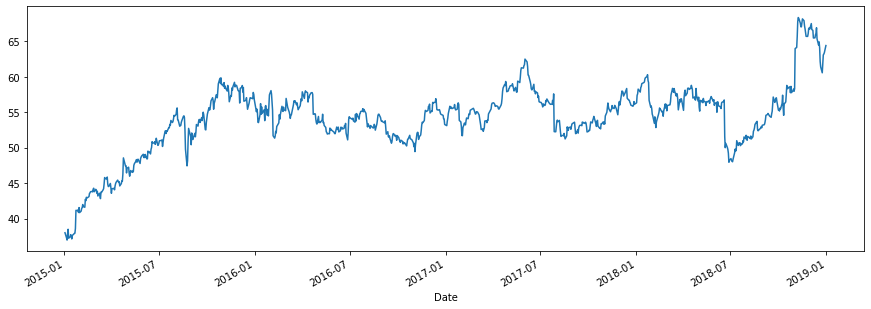

In [34]:
df["Close"].plot(figsize= (15,5))

In [35]:
# Plotting Daily Close Price and Moving Average of Last One Week:

df["Close : One Week Moving Average"] = df["Close"].rolling(window= 7).mean()

In [36]:
df.head(10)

,Close,Volume,Close : One Week Moving Average
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
2015-01-09,37.2361,27556706,NaN
2015-01-12,37.4415,10021486,37.616786
2015-01-13,37.7401,11040702,37.578786
2015-01-14,37.5301,9295084,37.614786


<AxesSubplot:xlabel='Date'>

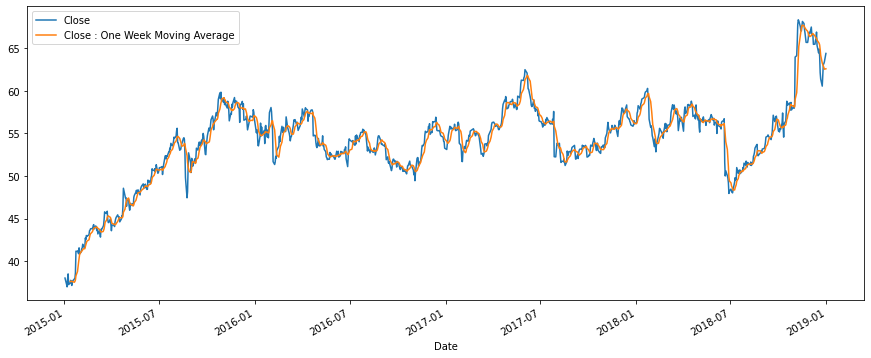

In [37]:
df[["Close", "Close : One Week Moving Average"]].plot(figsize= (15,6))

<AxesSubplot:xlabel='Date'>

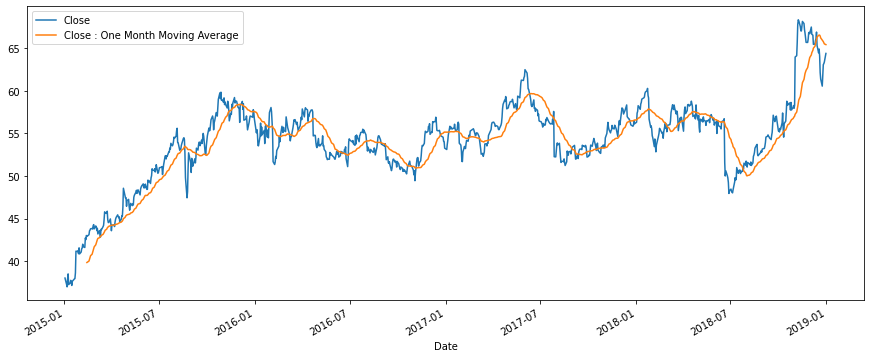

In [38]:
# Plotting Daily Close Price and Moving Average of Last One Month:

df["Close : One Month Moving Average"] = df["Close"].rolling(window= 30).mean()

df.head(10)

df[["Close", "Close : One Month Moving Average"]].plot(figsize= (15,6))

In [39]:
# Plotting Daily Close Price and Cummulative Average of Close Price:

df["Close: Cummulative Average"] = df["Close"].expanding(min_periods= 1).mean()

In [40]:
df.head(10)

,Close,Volume,Close : One Week Moving Average,Close : One Month Moving Average,Close: Cummulative Average
Date,,,,,
2015-01-02,38.0061,6906098,NaN,NaN,38.006100
2015-01-05,37.2781,11623796,NaN,NaN,37.642100
2015-01-06,36.9748,7664340,NaN,NaN,37.419667
2015-01-07,37.8848,9732554,NaN,NaN,37.535950
2015-01-08,38.4961,13170548,NaN,NaN,37.727980
2015-01-09,37.2361,27556706,NaN,NaN,37.646000
2015-01-12,37.4415,10021486,37.616786,NaN,37.616786
2015-01-13,37.7401,11040702,37.578786,NaN,37.632200
2015-01-14,37.5301,9295084,37.614786,NaN,37.620856


<AxesSubplot:xlabel='Date'>

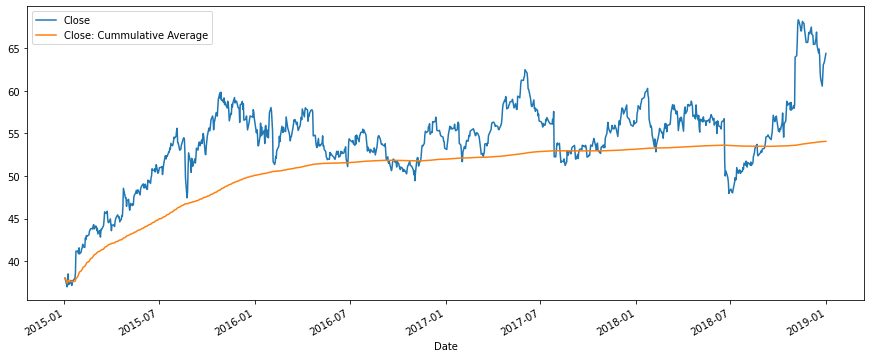

In [41]:
df[["Close", "Close: Cummulative Average"]].plot(figsize= (15,6))